In [15]:
pip install ipypb

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ipypb import ipb

In [11]:
import pandas as pd
import numpy as np
# 진행상황을 확인
from tqdm import tqdm

import pandas as pd
from pandas import Series
from pandas import DataFrame
 
import matplotlib.pyplot as plt
import seaborn as sns
 
 
import warnings
warnings.filterwarnings('ignore')
final = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/final.csv')

In [3]:
final

,membership_no,game_date,game_time,match_info,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,rank,sale,audience,new_price,reserve_diff,MB_AGE,job,favorite_idx
0,102806,2022-02-19,16:30:00,수원 삼성블루윙즈,1071932824,W1~W5 구역(World Class석),성인,W2구역,2,Y,5382,19000,5,26,무직,박창환
1,102806,2022-02-26,14:00:00,FC서울,1072061799,W1~W5 구역(World Class석),성인,W2구역,4,Y,4618,19000,5,26,무직,박창환
2,102806,2022-03-05,19:00:00,포항 스틸러스,1072180552,W1~W5 구역(World Class석),성인,W2구역,4,N,3581,19000,5,26,무직,박창환
3,102806,2022-04-02,14:00:00,울산 현대축구단,1072801423,W1~W5 구역(World Class석),성인,W2구역,2,Y,7054,38000,5,26,무직,박창환
4,102806,2022-04-10,16:30:00,제주 유나이티드,1073123113,W1~W5 구역(World Class석),성인,W2구역,2,Y,5234,19000,5,26,무직,박창환
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25147,135999,2022-10-16,19:00:00,포항 스틸러스,1083175559,S석/N석,청소년/어린이,S 3구역,4,N,7592,7000,0,46,회사원,이태희
25148,135999,2022-10-16,19:00:00,포항 스틸러스,1083175560,S석/N석,성인,S 3구역,4,N,7592,28000,0,46,회사원,이태희
25149,118359,2022-10-16,19:00:00,포항 스틸러스,1083175624,E석 2층(Expert석),예매권북,E15구역,4,Y,7592,20000,0,34,회사원,아길라르
25150,151980,2022-10-16,19:00:00,포항 스틸러스,1083175795,E석 2층(Expert석),성인,E15구역,4,N,7592,14000,0,24,대학생,김동민


In [12]:
df_cohort = final.copy()
# cohort 분석을 위해 membership, game_date, price만 남김
df_cohort = df_cohort.drop(['game_time','match_info','ticket_no','product_grade_name','product_denomination_name','seat_Attribute_4','rank','sale','audience','reserve_diff','MB_AGE','job','favorite_idx'], axis = 1)

In [14]:
df_cohort.info()
# object 형태라서 날짜로 형태로 변환
df_cohort['game_date'] = pd.to_datetime(df_cohort['game_date'])

# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically
# 월별 데이터가 목적이기 때문에 데이터 형식 치환
# 관점은 월별 소비자 집단을 규정하는 것임 date => month로 바꿔주는 과정 진행해야 함

## 각 구매가 이루어진 날짜
df_cohort['OrderCycle'] = df_cohort['game_date'].dt.strftime('%Y-%m')
df_cohort['OrderCycle'] = pd.to_datetime(df_cohort['OrderCycle'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25152 entries, 0 to 25151
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   membership_no  25152 non-null  int64 
 1   game_date      25152 non-null  object
 2   new_price      25152 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 589.6+ KB


In [15]:
# 고객별로 첫 구매가 언제 이루어졌는지 파악하기 
# Groupby 에서 min, max, nunique, sum 집계함수를 이용하여 데이터 처리
# 데이터 형태 Series로 저장하였는데, 차후 dataframe과 연결시 index기준으로 데이터 병합이 굉장히 용이함

# membership_no가 unique()된 것이나 마찬가지임
first_order = df_cohort.groupby('membership_no').game_date.min()
first_order

membership_no
137      2022-05-29
153      2022-02-19
180      2022-05-08
208      2022-02-19
291      2022-03-13
            ...    
151972   2022-10-16
151978   2022-10-16
151980   2022-10-16
151981   2022-10-16
151984   2022-10-16
Name: game_date, Length: 7427, dtype: datetime64[ns]

- 고객의 첫 구매 데이터 df_cohort에 붙이기 
    - pandas와 series데이터 병합시 tip : Index 기준으로 병합하기 
    - first_order는 index가 있는 Series데이터 
    - DF의 index를 membership_no로 설정한 뒤 지정하면, 자동으로 index 기준으로 데이터 병합이 가능함 

In [16]:
## Data Frame의 Index를 User Id로 일시적으로 변환함
df_cohort = df_cohort.set_index('membership_no')

## 데이터 Frist데이터는 Series + DF는 pandas이기 때문에 index 기준 자동 병합 가능 
df_cohort['first_order'] = first_order

# Index정상화 
df_cohort.reset_index(inplace = True)

df_cohort

,membership_no,game_date,new_price,OrderCycle,first_order
0,102806,2022-02-19,19000,2022-02-01,2022-02-19
1,102806,2022-02-26,19000,2022-02-01,2022-02-19
2,102806,2022-03-05,19000,2022-03-01,2022-02-19
3,102806,2022-04-02,38000,2022-04-01,2022-02-19
4,102806,2022-04-10,19000,2022-04-01,2022-02-19
...,...,...,...,...,...
25147,135999,2022-10-16,7000,2022-10-01,2022-10-16
25148,135999,2022-10-16,28000,2022-10-01,2022-10-16
25149,118359,2022-10-16,20000,2022-10-01,2022-10-16
25150,151980,2022-10-16,14000,2022-10-01,2022-10-16


In [17]:
customer_if = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/jupyter/customer.csv') 
customer_info = pd.merge(left = df_cohort, right = customer_if, how = 'left', on=['membership_no'])
# customer_info = customer_info.drop(['ticket_no','seat_Attribute_4'], axis = 1)
customer_info.dropna(inplace = True)

In [18]:
customer_info

,membership_no,game_date,new_price,OrderCycle,first_order,customer_type
0,102806,2022-02-19,19000,2022-02-01,2022-02-19,Platinum
1,102806,2022-02-26,19000,2022-02-01,2022-02-19,Platinum
2,102806,2022-03-05,19000,2022-03-01,2022-02-19,Platinum
3,102806,2022-04-02,38000,2022-04-01,2022-02-19,Platinum
4,102806,2022-04-10,19000,2022-04-01,2022-02-19,Platinum
...,...,...,...,...,...,...
25147,135999,2022-10-16,7000,2022-10-01,2022-10-16,Silver
25148,135999,2022-10-16,28000,2022-10-01,2022-10-16,Silver
25149,118359,2022-10-16,20000,2022-10-01,2022-10-16,Bronze
25150,151980,2022-10-16,14000,2022-10-01,2022-10-16,Bronze


In [21]:
# customer_info.to_csv('cohort1.csv', index = False)

### 월별로 구매 고객 데이터 치환
- 월별로 구매 고객 
    - 주기별 구매한 user의 수 계산
    - 주기별 구매한 금액 계산

In [20]:
# 이렇게 하면 membership_no별 합계가 나옴
# as_index를 하면 데이터프레임으로 나옴
final.groupby('membership_no', as_index = False)['new_price'].sum()

,membership_no,new_price
0,137,100000
1,153,164000
2,180,61000
3,208,281000
4,291,609000
...,...,...
7422,151972,40000
7423,151978,14000
7424,151980,14000
7425,151981,30000


In [21]:
## 주기별 구매 user
co1 = df_cohort.groupby(['first_order', 'OrderCycle']).membership_no.nunique()
co1 = co1.reset_index()
co1.rename({'membership_no' : 'TotalUsers'}, axis = 1, inplace = True)

## 주기별 구매 금액 계산
co2 = df_cohort.groupby(['first_order', 'OrderCycle']).new_price.sum()
co2 = co2.reset_index()
co2.rename({'new_price' : 'PurchaseAmnt'}, axis = 1, inplace = True)

co = co1.merge(co2, on = ['first_order', 'OrderCycle'])
co

In [17]:
# co.to_csv('cohort.csv', index = False)

### 코호트 기간 기준 계산 및 데이터 형태 최종 완성 
- 코호트 기간 기준 계산 방법
```
코호트 기준 기간을 계산해야 함.
first_order과 OrderCycle 두 기간의 차이를 월로 계산해야 함
```

In [28]:
temp = []

for i in ipb(range(co.shape[0])):
    f_first_order = pd.to_datetime(co.first_order[i]).to_period('M')
    f_order_cycle = pd.to_datetime(co.OrderCycle[i]).to_period('M')
    
    month_diff = (f_order_cycle - f_first_order).n
    
    temp.append(month_diff)
    
co['CohortPeriod'] = temp

 [████████████████████████████████████████████████████████████] 91/91 [00:00<00:00, 0.00s/it]

### 코호트 데이터 형태 최종 완성 padnas unstack 활용하기 
- Pandas stack & unstack 메소드 설명
- pd.stack은 Column에 있는 값들을 Index로 변환해주는 명령어이다. 
- pd.unstack은 index에 있는 값들을 column으로 변환해주는 명령어이다. 
    - co.TotalUsers.unstack(1)
    - : co라는 데이터에서 TotalUsers들 값을 기준으로 계산할 거야. 근데 인덱스 중 2번째 인덱스 Cohort Period를 Column으로 이동시켜달라고 명령
        - 두 번째 인덱스가 Column으로 이동하게 된다. 이 형태가 최종적으로 데이터 분석의 마무리 형태

In [29]:
# 재방문율을 계산하기 위해 Pandas Unstack 
co_retention = co.set_index(['first_order', 'CohortPeriod'])
co_retention = co_retention.TotalUsers.unstack(1)
retention = co_retention.div(co_retention[0], axis =0)

# stomer_cohort = df_cohort.pivot_table(index = 'CohortMonth', columns = 'CohortPeriod', values = 'membership_no', aggfunc = 'nunique')

In [30]:
co_retention

CohortPeriod,0,1,2,3,4,5,6,7,8
first_order,,,,,,,,,
2022-02-19,1101.0,453.0,519.0,501.0,224.0,221.0,510.0,391.0,542.0
2022-02-26,429.0,111.0,136.0,118.0,31.0,36.0,123.0,78.0,114.0
2022-03-05,328.0,83.0,88.0,32.0,29.0,101.0,60.0,96.0,NaN
2022-03-13,184.0,69.0,66.0,17.0,19.0,48.0,32.0,56.0,NaN
2022-04-02,589.0,127.0,40.0,34.0,134.0,78.0,131.0,NaN,NaN
2022-04-10,439.0,136.0,23.0,16.0,100.0,52.0,115.0,NaN,NaN
2022-05-08,516.0,17.0,29.0,102.0,57.0,98.0,NaN,NaN,NaN
2022-05-17,175.0,28.0,26.0,42.0,34.0,45.0,NaN,NaN,NaN
2022-05-29,325.0,15.0,25.0,66.0,29.0,70.0,NaN,NaN,NaN


In [31]:
# 구매 규모 형태 치환을 위해 pandas unstack 활용
co_purchase = co.set_index(['first_order', 'CohortPeriod'])
co_purchase = co_purchase.PurchaseAmnt.unstack(1)

In [32]:
co_purchase

CohortPeriod,0,1,2,3,4,5,6,7,8
first_order,,,,,,,,,
2022-02-19,43518500.0,16354000.0,26751000.0,27350000.0,6305500.0,6327000.0,33424000.0,16080500.0,41493500.0
2022-02-26,12387500.0,4007500.0,6253500.0,5386000.0,605000.0,1309000.0,6145500.0,3074000.0,7740000.0
2022-03-05,11938500.0,3375500.0,4065000.0,994500.0,811000.0,5569000.0,2251500.0,6003000.0,NaN
2022-03-13,5510000.0,2985000.0,3088500.0,431500.0,513500.0,2724500.0,1275000.0,2843000.0,NaN
2022-04-02,25308000.0,6730000.0,1060500.0,1162000.0,8274500.0,3094500.0,9580500.0,NaN,NaN
2022-04-10,17648500.0,8198500.0,746000.0,402000.0,4984500.0,2184500.0,6565500.0,NaN,NaN
2022-05-08,24456500.0,828500.0,885000.0,5160000.0,2323500.0,6099000.0,NaN,NaN,NaN
2022-05-17,7195500.0,1257000.0,1124500.0,2506000.0,1642000.0,2453000.0,NaN,NaN,NaN
2022-05-29,13795500.0,525000.0,1331000.0,4084500.0,1480500.0,4852500.0,NaN,NaN,NaN


### 코호트 분석 시각화 Cohort Analysis Visualization

In [33]:
cohort_size = co_retention.iloc[:,0]
retention1 = co_retention.divide(cohort_size, axis = 0)
#axis=0 to ensure the divide along the row axis
retention1.index = pd.to_datetime(retention.index).date
retention1.round(3) * 100 

CohortPeriod,0,1,2,3,4,5,6,7,8
2022-02-19,100.0,41.1,47.1,45.5,20.3,20.1,46.3,35.5,49.2
2022-02-26,100.0,25.9,31.7,27.5,7.2,8.4,28.7,18.2,26.6
2022-03-05,100.0,25.3,26.8,9.8,8.8,30.8,18.3,29.3,NaN
2022-03-13,100.0,37.5,35.9,9.2,10.3,26.1,17.4,30.4,NaN
2022-04-02,100.0,21.6,6.8,5.8,22.8,13.2,22.2,NaN,NaN
2022-04-10,100.0,31.0,5.2,3.6,22.8,11.8,26.2,NaN,NaN
2022-05-08,100.0,3.3,5.6,19.8,11.0,19.0,NaN,NaN,NaN
2022-05-17,100.0,16.0,14.9,24.0,19.4,25.7,NaN,NaN,NaN
2022-05-29,100.0,4.6,7.7,20.3,8.9,21.5,NaN,NaN,NaN
2022-06-22,100.0,21.5,27.7,22.3,26.9,NaN,NaN,NaN,NaN


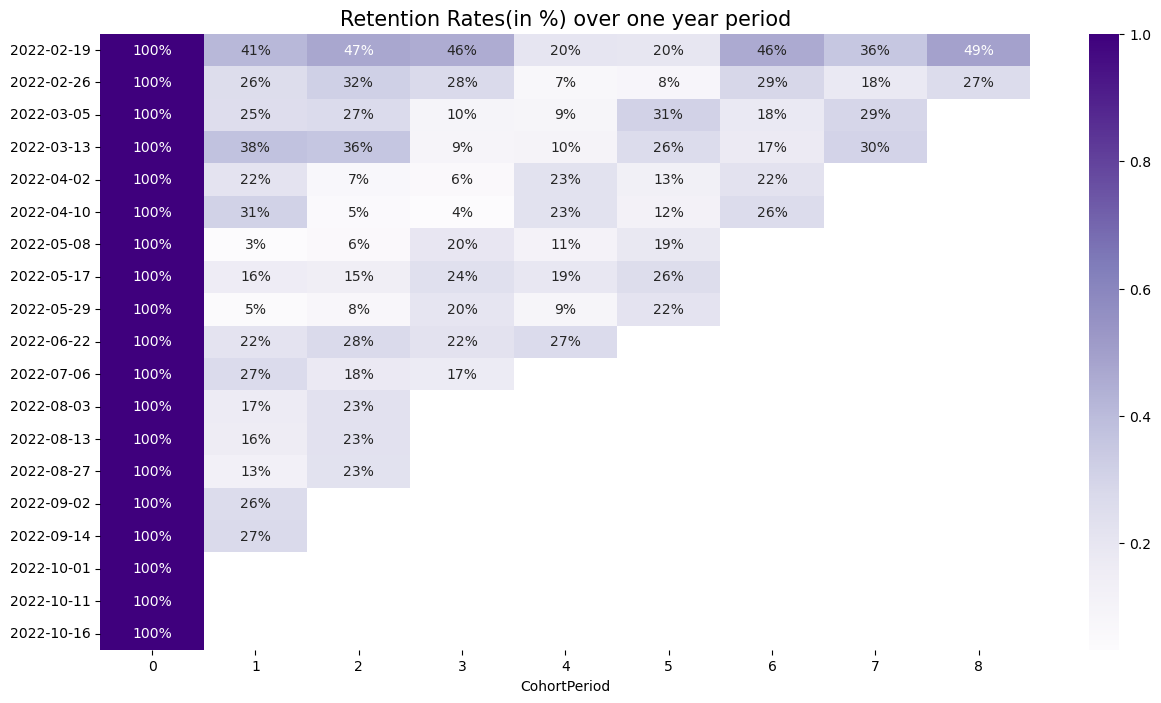

In [45]:
# 고객 유지율 
plt.figure(figsize=(15, 8))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention1, annot = True, fmt = '.0%', cmap="Purples")
plt.show()

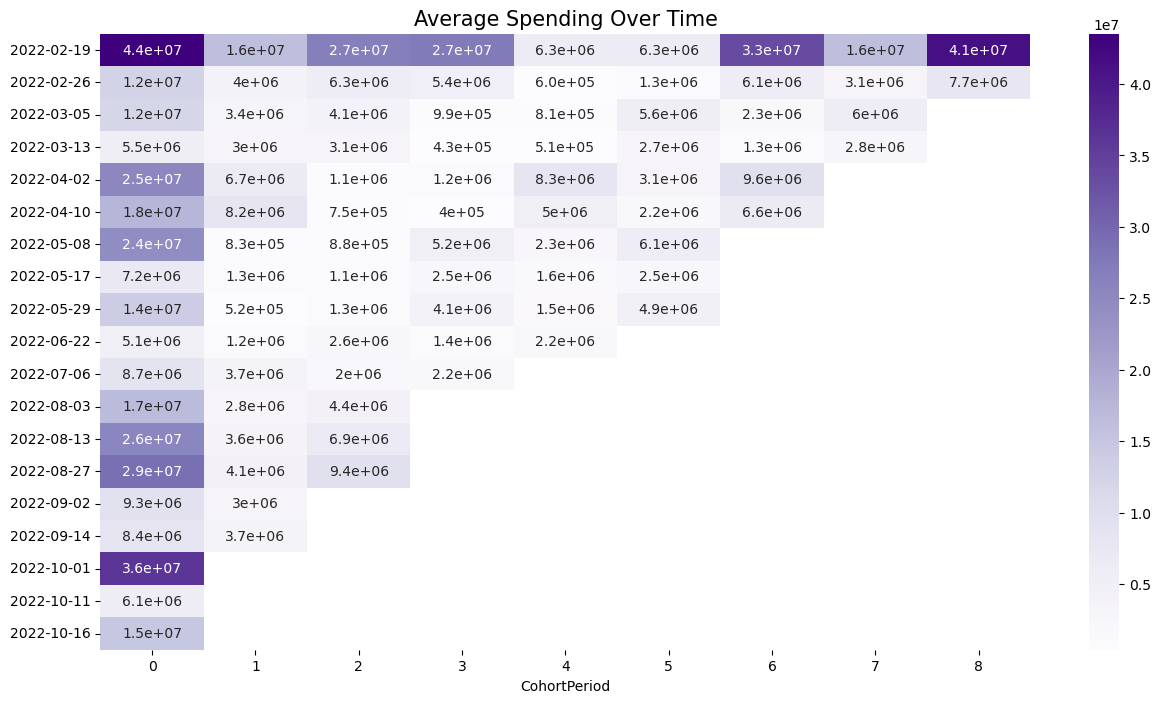

In [46]:
# 구매 규모 시각화 
co_purchase.index = pd.to_datetime(co_purchase.index).date
plt.figure(figsize=(15, 8))
plt.title('Average Spending Over Time', size=15)
sns.heatmap(data = co_purchase, annot = True, cmap="Purples")
plt.show()

[참고사이트](https://data-marketing-bk.tistory.com/entry/Python-COHORT-%EB%B6%84%EC%84%9D-%EA%B0%9C%EB%85%90%EB%B6%80%ED%84%B0-%EC%8B%A4%EC%A0%84-%EC%BD%94%EB%93%9C%EA%B9%8C%EC%A7%80-feat-%EB%B6%84%EC%84%9D-%EC%98%88%EC%A0%9C-%ED%8F%AC%ED%95%A8)